In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('./News.csv')

In [3]:
df=data[0:1000]

In [4]:
df

,link,headline,category,short_description,authors,date
0,https://www.huffpost.com/entry/covid-boosters-...,Over 4 Million Americans Roll Up Sleeves For O...,U.S. NEWS,Health experts said it is too early to predict...,"Carla K. Johnson, AP",2022-09-23
1,https://www.huffpost.com/entry/american-airlin...,"American Airlines Flyer Charged, Banned For Li...",U.S. NEWS,He was subdued by passengers and crew when he ...,Mary Papenfuss,2022-09-23
2,https://www.huffpost.com/entry/funniest-tweets...,23 Of The Funniest Tweets About Cats And Dogs ...,COMEDY,"""Until you have a dog you don't understand wha...",Elyse Wanshel,2022-09-23
3,https://www.huffpost.com/entry/funniest-parent...,The Funniest Tweets From Parents This Week (Se...,PARENTING,"""Accidentally put grown-up toothpaste on my to...",Caroline Bologna,2022-09-23
4,https://www.huffpost.com/entry/amy-cooper-lose...,Woman Who Called Cops On Black Bird-Watcher Lo...,U.S. NEWS,Amy Cooper accused investment firm Franklin Te...,Nina Golgowski,2022-09-22
...,...,...,...,...,...,...
995,https://www.huffpost.com/entry/china-weighs-ex...,China Weighs Exit From 'Zero COVID' And The Ri...,WORLD NEWS,The change does not appear imminent as the gov...,"Dake Kang and Huizhong Wu, AP",2022-03-18
996,https://www.huffpost.com/entry/russian-missile...,Russian Missiles Hit Near Lviv Airport As Stri...,WORLD NEWS,World leaders have been calling for an investi...,"Cara Anna, AP",2022-03-18
997,https://www.huffpost.com/entry/assad-uae_n_623...,"Syria's Assad Visits UAE, 1st Trip To Arab Cou...",WORLD NEWS,Assad's office said he met with Sheikh Mohamed...,NaN,2022-03-18
998,https://www.huffpost.com/entry/japan-earthquak...,"Strong Japan Earthquake Kills 4, Injures 107",WORLD NEWS,The 7.4-magnitude temblor knocked out power an...,"Mari Yamaguchi, AP",2022-03-17


In [5]:
df['category'].value_counts()

POLITICS          272
ENTERTAINMENT     185
U.S. NEWS         174
WORLD NEWS        138
SPORTS             36
CRIME              26
ENVIRONMENT        25
CULTURE & ARTS     23
WELLNESS           16
PARENTING          15
WEIRD NEWS         14
FOOD & DRINK       14
COMEDY             11
BUSINESS            9
STYLE & BEAUTY      9
TECH                8
SCIENCE             5
WOMEN               5
EDUCATION           3
MEDIA               3
HOME & LIVING       3
BLACK VOICES        3
QUEER VOICES        2
TRAVEL              1
Name: category, dtype: int64

In [6]:
import nltk
import re

In [7]:
from nltk.corpus import stopwords
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [8]:
stop=set(stopwords.words('english'))

In [9]:
from nltk.stem.porter import PorterStemmer

In [10]:
portStem = PorterStemmer()

In [11]:
stop = stopwords.words('english')

df['short_description'] =df['short_description'].apply(lambda x: ' '.join([portStem.stem(word) for word in x.split() if word not in (stop)]))

<ipython-input-11-d37706c05610>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['short_description'] =df['short_description'].apply(lambda x: ' '.join([portStem.stem(word) for word in x.split() if word not in (stop)]))


In [12]:
df['short_description']

0      health expert said earli predict whether deman...
1      he subdu passeng crew fled back aircraft confr...
2                    "until dog understand could eaten."
3      "accident put grown-up toothpast toddler’ toot...
4      ami cooper accus invest firm franklin templeto...
                             ...                        
995    the chang appear immin govern continu polici s...
996    world leader call investig russia' repeat atta...
997    assad' offic said met sheikh moham bin rashid ...
998    the 7.4-magnitud temblor knock power caus exte...
999    two canadian student also hospit critic condit...
Name: short_description, Length: 1000, dtype: object

In [24]:
df.short_description = df.apply(lambda row: " ".join(re.sub("[^a-zA-Z]+", " ", row.short_description).split()), 1)

In [26]:
df['short_description']

0      health expert said earli predict whether deman...
1      he subdu passeng crew fled back aircraft confr...
2                       until dog understand could eaten
3      accident put grown up toothpast toddler toothb...
4      ami cooper accus invest firm franklin templeto...
                             ...                        
995    the chang appear immin govern continu polici s...
996    world leader call investig russia repeat attac...
997    assad offic said met sheikh moham bin rashid a...
998    the magnitud temblor knock power caus extens d...
999    two canadian student also hospit critic condition
Name: short_description, Length: 1000, dtype: object

In [27]:
import re
from bs4 import BeautifulSoup
from tqdm import tqdm
pre_text = []
food = ""
business = ""
sports = ""
for x in tqdm(range(len(df))):
    
    s = df["headline"][x] + " " + df["short_description"][x] 
    s = [e.lower() for e in s.split() if e.lower() not in stop]
   
    pre_text.append(s)
  
print(pre_text)



100%|██████████| 1000/1000 [00:00<00:00, 10791.45it/s]

[['4', 'million', 'americans', 'roll', 'sleeves', 'omicron-targeted', 'covid', 'boosters', 'health', 'expert', 'said', 'earli', 'predict', 'whether', 'demand', 'would', 'match', 'million', 'dose', 'new', 'booster', 'u', 'order', 'fall'], ['american', 'airlines', 'flyer', 'charged,', 'banned', 'life', 'punching', 'flight', 'attendant', 'video', 'subdu', 'passeng', 'crew', 'fled', 'back', 'aircraft', 'confrontation', 'accord', 'u', 'attorney', 'offic', 'lo', 'angeles'], ['23', 'funniest', 'tweets', 'cats', 'dogs', 'week', '(sept.', '17-23)', 'dog', 'understand', 'could', 'eaten'], ['funniest', 'tweets', 'parents', 'week', '(sept.', '17-23)', 'accident', 'put', 'grown', 'toothpast', 'toddler', 'toothbrush', 'scream', 'like', 'clean', 'teeth', 'carolina', 'reaper', 'dip', 'tabasco', 'sauce'], ['woman', 'called', 'cops', 'black', 'bird-watcher', 'loses', 'lawsuit', 'ex-employer', 'ami', 'cooper', 'accus', 'invest', 'firm', 'franklin', 'templeton', 'unfairli', 'fire', 'brand', 'racist', 'vid

In [28]:
import gensim

In [29]:
dictionary = gensim.corpora.Dictionary(pre_text)

In [30]:
bow_corpus = [dictionary.doc2bow(doc) for doc in pre_text ]

In [31]:
lda_model =  gensim.models.LdaMulticore(bow_corpus, 
                                   num_topics = 17, 
                                   id2word = dictionary,                                    
                                   passes = 50,
                                   workers = 2)

In [42]:
import re
topics=[]
for idx, topic in lda_model.print_topics(-1):
    print("Topic: {} \nWords: {}".format(idx, topic ))
    topics.append(topic)
    print("\n")
#print(topics)
topic1=[]
for i in range(len(topics)):
  x=re.sub("[^a-zA-Z]+", " ",topics[i])
  topic1.append(x)

Topic: 0 
Words: 0.005*"said" + 0.005*"biden" + 0.004*"gop" + 0.004*"trump" + 0.004*"abbott" + 0.004*"republican" + 0.004*"presid" + 0.003*"hous" + 0.003*"new" + 0.003*"need"


Topic: 1 
Words: 0.006*"water" + 0.005*"former" + 0.005*"trump" + 0.004*"twitter" + 0.004*"week" + 0.003*"one" + 0.003*"first" + 0.003*"texas" + 0.003*"leader" + 0.003*"go"


Topic: 2 
Words: 0.006*"trump" + 0.005*"man" + 0.004*"said" + 0.004*"jackson" + 0.004*"new" + 0.004*"court" + 0.003*"show" + 0.003*"black" + 0.003*"want" + 0.003*"last"


Topic: 3 
Words: 0.011*"trump" + 0.006*"russian" + 0.005*"ukraine" + 0.005*"presid" + 0.005*"new" + 0.004*"former" + 0.004*"donald" + 0.004*"said" + 0.004*"house" + 0.004*"u"


Topic: 4 
Words: 0.008*"said" + 0.005*"time" + 0.004*"gop" + 0.004*"get" + 0.004*"russian" + 0.004*"new" + 0.004*"trump" + 0.003*"r" + 0.003*"democrat" + 0.003*"war"


Topic: 5 
Words: 0.007*"star" + 0.004*"kardashian" + 0.004*"children" + 0.004*"home" + 0.004*"gun" + 0.003*"said" + 0.003*"lawsuit" 

In [43]:
cluster1=topic1[0]

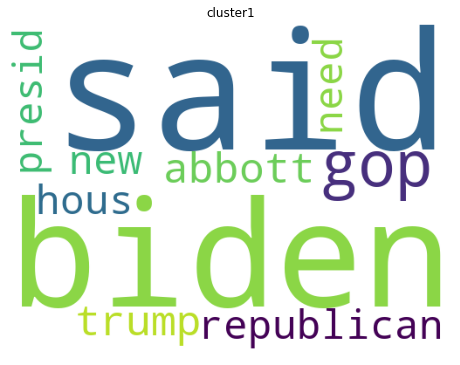

In [44]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

plt.subplots(figsize = (8,8))

wordcloud = WordCloud (
                    background_color = 'white',
                    width = 512, 
                    height = 384
                        ).generate(cluster1)
plt.imshow(wordcloud) # image show
plt.title("cluster1")
plt.axis('off') # to off the axis of x and y
plt.show()

In [45]:
cluster2=topic1[1]

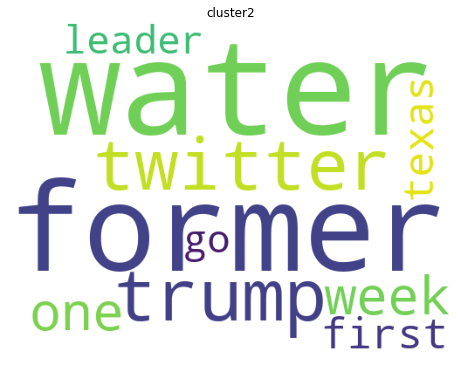

In [46]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

plt.subplots(figsize = (8,8))

wordcloud = WordCloud (
                    background_color = 'white',
                    width = 512, 
                    height = 384
                        ).generate(cluster2)
plt.imshow(wordcloud) # image show
plt.title("cluster2")
plt.axis('off') # to off the axis of x and y
plt.show()

In [47]:
cluster3=topic1[2]

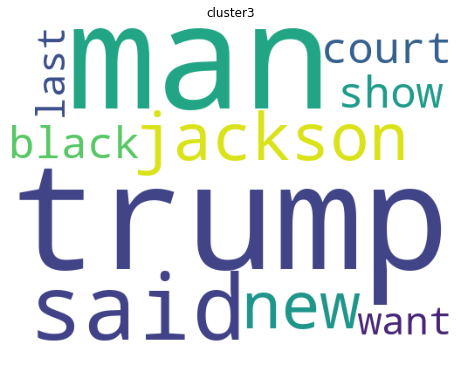

In [48]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

plt.subplots(figsize = (8,8))

wordcloud = WordCloud (
                    background_color = 'white',
                    width = 512, 
                    height = 384
                        ).generate(cluster3)
plt.imshow(wordcloud) # image show
plt.title("cluster3")
plt.axis('off') # to off the axis of x and y
plt.show()

In [33]:
pip install bertopic[visualization]

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 90 kB 5.0 MB/s 
     |████████████████████████████████| 5.2 MB 16.9 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 85 kB 4.4 MB/s 
     |████████████████████████████████| 662 kB 53.7 MB/s 
     |████████████████████████████████| 88 kB 4.9 MB/s 
     |████████████████████████████████| 5.8 MB 44.9 MB/s 
     |████████████████████████████████| 1.3 MB 37.1 MB/s 
     |████████████████████████████████| 182 kB 58.0 MB/s 
     |████████████████████████████████| 7.6 MB 37.7 MB/s 
     |████████████████████████████████| 1.1 MB 45.7 MB/s 
  Created wheel for hdbscan: filename=hdbscan-0.8.29-cp38-cp38-linux_x86_64.whl size=2700806 sha256=da87d2fb11e8f36d12d8c5f8fc159559573c76e90f3e92fd7b1c76ddb9ef6c69
  Stored in directory: /root/.cache/

In [34]:
from bertopic import BERTopic

In [35]:
df['short_description']

0      health expert said earli predict whether deman...
1      he subdu passeng crew fled back aircraft confr...
2                       until dog understand could eaten
3      accident put grown up toothpast toddler toothb...
4      ami cooper accus invest firm franklin templeto...
                             ...                        
995    the chang appear immin govern continu polici s...
996    world leader call investig russia repeat attac...
997    assad offic said met sheikh moham bin rashid a...
998    the magnitud temblor knock power caus extens d...
999    two canadian student also hospit critic condition
Name: short_description, Length: 1000, dtype: object

In [36]:
df.short_description = df.apply(lambda row: " ".join(re.sub("[^a-zA-Z]+", " ", row.short_description).split()), 1)
df.headline	= df.apply(lambda row: " ".join(re.sub("[^a-zA-Z]+", " ", row.headline).split()), 1)
pre=[]
for x in tqdm(range(len(df))):
    
    s = df["headline"][x] + " " + df["short_description"][x] 
    pre.append(s)


100%|██████████| 1000/1000 [00:00<00:00, 73549.44it/s]


In [37]:
type(pre)

list

In [39]:

topic_model = BERTopic(verbose=True,language="english")
topics, probs = topic_model.fit_transform(pre)

Downloading:   0%|          | 0.00/1.18k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/190 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/10.6k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/612 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/116 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/39.3k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/90.9M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/112 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/466k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/350 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/13.2k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/232k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/349 [00:00<?, ?B/s]

Batches:   0%|          | 0/32 [00:00<?, ?it/s]

2022-12-06 06:10:42,071 - BERTopic - Transformed documents to Embeddings
2022-12-06 06:10:54,447 - BERTopic - Reduced dimensionality
2022-12-06 06:10:54,532 - BERTopic - Clustered reduced embeddings


In [40]:
topic_model.get_topic_freq()

,Topic,Count
0,-1,367
1,0,109
2,1,80
3,2,78
4,3,49
5,4,47
6,5,42
7,6,42
8,7,27
10,8,22


In [50]:
topic_model.get_topic(0)

[('ukraine', 0.0688279997043064),
 ('russian', 0.06791712540991693),
 ('russia', 0.04875134891083915),
 ('ukrainian', 0.0431005954127089),
 ('war', 0.039595692987663786),
 ('mariupol', 0.030066308678988317),
 ('putin', 0.027456669988835017),
 ('biden', 0.025831053627664777),
 ('kyiv', 0.02475095135953943),
 ('zelenskyy', 0.02475095135953943)]

In [51]:
topic_model.get_topic(1)

[('water', 0.035183687014512875),
 ('in', 0.034367589235245834),
 ('storm', 0.03113645901347753),
 ('fire', 0.026281088937897826),
 ('flood', 0.025985742474542665),
 ('california', 0.025644738769281014),
 ('dead', 0.022229432870429063),
 ('crash', 0.02155601008625367),
 ('park', 0.021260475213412476),
 ('mississippi', 0.01940428033980252)]

In [52]:
topic_model.get_topic(12)

[('nfl', 0.07848088442307825),
 ('quarterback', 0.05323427906685268),
 ('clemens', 0.045093329062077414),
 ('soccer', 0.04294710559435599),
 ('cup', 0.04294710559435599),
 ('pitch', 0.04294710559435599),
 ('player', 0.041283709129027166),
 ('record', 0.03954886354926359),
 ('world', 0.038042692843283626),
 ('billion', 0.03542096467976314)]

In [53]:
topic_model.visualize_topics()


In [54]:
topic_model.get_topic(4)

[('trump', 0.0942578405486983),
 ('jan', 0.0602795161235107),
 ('probe', 0.045763691430759014),
 ('former', 0.043932583702835974),
 ('secret', 0.04078038138554413),
 ('hous', 0.0399601627291073),
 ('panel', 0.037434987732347796),
 ('the', 0.030866443590610977),
 ('bannon', 0.02911610156960384),
 ('steve', 0.02911610156960384)]

In [55]:

News=topic_model.get_topic(4)
news=str(list(zip(*News))[0])


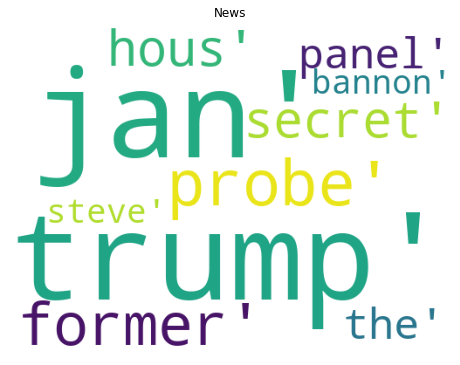

In [56]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

plt.subplots(figsize = (8,8))

wordcloud = WordCloud (
                    background_color = 'white',
                    width = 512, 
                    height = 384
                        ).generate(news)
plt.imshow(wordcloud) # image show
plt.title("News")
plt.axis('off') # to off the axis of x and y
plt.show()

In [57]:
Sports=topic_model.get_topic(12)
sports=str(list(zip(*Sports))[0])

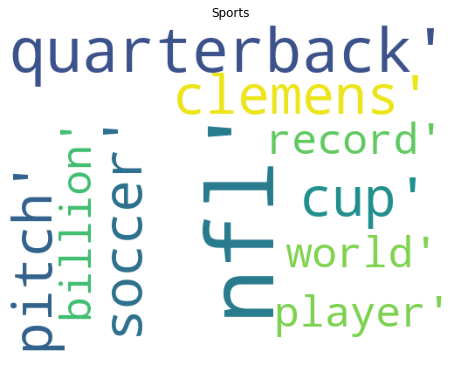

In [58]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

plt.subplots(figsize = (8,8))

wordcloud = WordCloud (
                    background_color = 'white',
                    width = 512,
                    height = 384
                        ).generate(sports)
plt.imshow(wordcloud) # image show
plt.title("Sports")
plt.axis('off') # to off the axis of x and y
plt.show()

In [60]:
text=df['short_description'].tolist()

In [61]:
timestamps = df.date.to_list()

In [63]:

topics_over_time = topic_model.topics_over_time(text, timestamps, nr_bins=20)

20it [00:01, 12.63it/s]


In [66]:
topic_model.visualize_topics_over_time(topics_over_time, topics=[0, 1,2,12])